# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%load_ext Cython

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [3]:
N = 20 # put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [25]:
## Задание 1
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin


class mDBSCAN(BaseEstimator, ClusterMixin):
    """
    Реализация алгоритма DBSCAN
    """

    def __init__(self, eps=0.5, min_samples=5):
        """
        Parameters
        -----------
        :param eps: радиус окрестности
        :param min_samples:  минимальное количество объектов в окрестности для кластера
        """
        self.eps = eps
        self.min_pts = min_samples

        return

    def fit(self, x, y=None):
        """
        Реализация DBSCAN.
        метка выбросов: -1

        Parameters
        -----------
        :param x: массив объектов размера N на M где N - количество объектов, M - количество признаков
        :param y: Игнорируется
        """
        self.X_len = len(x)

        # посещен или не посещен объект (0,1)
        self.is_object_visited = np.zeros(x.shape[0])
        # индес объекта - кластер
        self.labels = np.zeros(x.shape[0], dtype=long)
        self.labels.fill(-1)
        # количество кластеров
        self.clusters_count = 0

        # матрица квадратоввзаимных расстояний
        self.mutual_distances = (np.square((x[np.newaxis, :] - x[:, np.newaxis]))).sum(axis=2)

        # Индексы объектов в эпслион окрестности друг друга, исключая индекс самого себя
        self.eps_neighborhood_indexes = np.argwhere(self.mutual_distances < self.eps ** 2)
        self.eps_neighborhood_indexes = self.eps_neighborhood_indexes[self.eps_neighborhood_indexes[:, 0] != self.eps_neighborhood_indexes[:, 1]]

        while len(self.is_object_visited[self.is_object_visited == 0]) > 0:

            # непосещенные индесы
            indexes_not_visited = np.argwhere(self.is_object_visited == 0)

            # выбираем произвольный непосещенный объект по индексу
            current_x_index = indexes_not_visited[np.random.randint(0, len(indexes_not_visited))]

            # считаем посещенным
            self.is_object_visited[current_x_index] = 1

            # возвращаем его эпсилон окрестность
            eps_neighborhood_of_current_x_index = self.neighbours(current_x_index)

            # если в эпсилон оекрестности меньше минимума точек то считаем выбросом
            if len(eps_neighborhood_of_current_x_index) <= self.min_pts:
                self.labels[current_x_index] = -1
            else:
                # раскрываем кластер
                self.expand_cluster(eps_neighborhood_of_current_x_index)
                self.clusters_count += 1

        return self

    def neighbours(self, current_x_index):
        """
        Возвращает соседей в eps окрестности точки
        """

        eps_neighborhood_of_current_x_index = self.eps_neighborhood_indexes[self.eps_neighborhood_indexes[:, 0] == current_x_index]
        eps_neighborhood_of_current_x_index = eps_neighborhood_of_current_x_index.transpose()[1]

        return eps_neighborhood_of_current_x_index

    def expand_cluster(self, eps_neighborhood_of_current_x_index):

        #инициализация кластера как окрестности одного объекта
        new_cluster = eps_neighborhood_of_current_x_index

        #индекс текущего объекта из кластера
        index_in_new_cluster = 0

        #длина кластера
        length_of_new_cluster = len(new_cluster)

        while index_in_new_cluster < length_of_new_cluster:

            #индекс объекта из кластера
            x1_index = new_cluster[index_in_new_cluster]

            if self.is_object_visited[x1_index] == 0:

                self.is_object_visited[x1_index] = 1
                nbr_of_x1 = self.neighbours(x1_index)

                if len(nbr_of_x1) > self.min_pts:
                    # добавляем соседей текущего объекта
                    new_cluster = np.append(new_cluster, nbr_of_x1)
                    # update length of neibourhood
                    length_of_new_cluster += nbr_of_x1.shape[0]

            if self.labels[x1_index] == -1:
                self.labels[x1_index] = self.clusters_count

            index_in_new_cluster += 1

        return self

    def predict(self, x=None):
        """
        Возвращает вычисленные метки принадлежности объектов к кластерам
        :param x: игнорируется
        :return: метки принадлежности объектов к кластерам
        """
        return self.labels

    def fit_predict(self, x, y=None):
        """
        Выполняет алгоритм DBSCAN на объектах x и возвращает метки принадлежности объектов к кластерам
        :param x: массив объектов размера N на M где N - количество объектов, M - количество признаков
        :param y: игнорируется
        :return: метки принадлежности объектов к кластерам
        """
        self.fit(x, y)
        return self.predict(x)


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

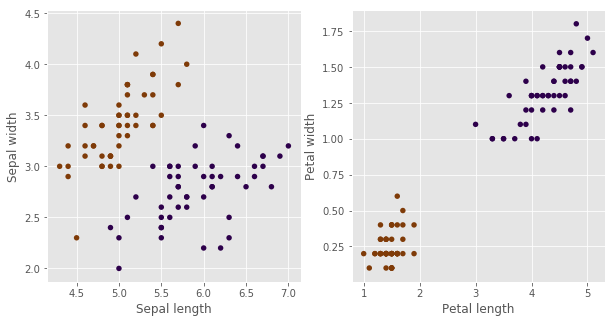

[ 5.1  3.5  1.4  0.2]


In [6]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

print x_iris[0]

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [7]:
from line_profiler import LineProfiler
def profile_print(func_to_call, *args):
    profiler = LineProfiler()
    profiler.add_function(func_to_call)
    profiler.runcall(func_to_call, *args)
    profiler.print_stats()

In [8]:
from sklearn import metrics
model = mDBSCAN(eps = 0.8, min_samples=5)
%timeit model.fit(x_iris)
pred_iris = model.predict()
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

100 loops, best of 3: 4.45 ms per loop
Adjusted Rand index for iris is: 1.00


In [9]:
# Сравнение с sklearn
from sklearn import cluster
skmodel = cluster.DBSCAN(eps = 0.8, min_samples=5)
%timeit skmodel.fit(x_iris)
pred_iris = skmodel.fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

1000 loops, best of 3: 756 µs per loop
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [10]:
## Задание 2
class mSihouette:
    '''
      Sihouette
    '''     
    def c_a(self, x_ind, c_ind):
        
        icl = np.argwhere(self.Y == c_ind)
        
        res = self.distances[x_ind][icl].sum()
        res = res / (icl.shape[0] - 1 )
            
        return res
    
    
    def c_b(self, x_ind, c_ind):
        
        clusters = np.unique(self.Y)
        cl_dst = np.zeros(clusters.shape[0])
        cl_dst[c_ind] = -1
        for k in np.unique(self.Y):
            k = int(k)
            if k == c_ind:
                continue
                
            nck = np.argwhere(self.Y == k)
            cl_dst[k] = self.distances[x_ind][nck].sum() / nck.shape[0]
        
        cl_dst = cl_dst[cl_dst >= 0]
#         print cl_dst
        return cl_dst.min()
    

    def quality(self, X, Y):
        """
         Implement quality criterion of your choice
        """
        silh_res = np.zeros(X.shape[0])
        
        self.Y = Y
        self.distances = np.sqrt((np.square((X[np.newaxis, :] - X[:, np.newaxis]))).sum(axis=2))
        
        res = 0
        
        for x_ind in range(0,X.shape[0]):
            
            c_ind = int(self.Y[x_ind])
            
            a = self.c_a(x_ind, c_ind)
            b = self.c_b(x_ind, c_ind)
            silh_res[x_ind] = ( b-a )/ np.max([a,b])
            res += ( b-a )/ np.max([a,b])
        return res / X.shape[0]

In [31]:
%%cython -a
cimport numpy as np
import numpy as np
import cython
from libc.math cimport sqrt

@cython.boundscheck(False)
@cython.cdivision(True)
cdef calculate_a(long x_ind,  long c_ind, double[:,:] distances,
          long[:] Y, long  y_size):
    
    cdef long clust_count =0;
    cdef double mean_cl_dist =0;
    
    clust_count =0
    for i in xrange(y_size):
        if Y[i] == c_ind:
            mean_cl_dist += distances[x_ind,i]
            clust_count  +=1
            
    mean_cl_dist = mean_cl_dist/(clust_count-1)
            
    return mean_cl_dist

@cython.boundscheck(False)
@cython.cdivision(True)
cdef calculate_b(long x_ind,long c_ind, np.ndarray[double, ndim=2] distances, 
          np.ndarray[long, ndim=1] Y, long  y_size, long clusters_clount,
          np.ndarray[double, ndim=1] mean_distance_to_clusters, 
          np.ndarray[long, ndim=1] clusters_size
         ):   
    
    cdef np.float64_t  min_mean_distance = 0;
    
    for i in xrange(clusters_clount):
        mean_distance_to_clusters[i] = 0
        clusters_size[i] = 0
    
    clusters_size[c_ind] = 1;
    mean_distance_to_clusters[c_ind] = 10000000;
    
    for i in xrange(y_size):      
        if Y[i] != c_ind:    
            clusters_size[Y[i]] += 1
            mean_distance_to_clusters[Y[i]] += distances[x_ind,i]
    
    
    for ci in xrange(clusters_clount):
        if ci != c_ind:
            mean_distance_to_clusters[ci] /= clusters_size[ci]
    
    if c_ind == 0:
        min_mean_distance = mean_distance_to_clusters[1]
    else:
        min_mean_distance = mean_distance_to_clusters[0]
    
    for i in xrange(clusters_clount):        
        if i != c_ind and mean_distance_to_clusters[i] < min_mean_distance:
            min_mean_distance = mean_distance_to_clusters[i]
            
    return min_mean_distance

@cython.boundscheck(False)
@cython.cdivision(True)
cpdef silhouette_quality_cython(np.ndarray[double, ndim=2] X,  np.ndarray[long, ndim=1] Y):
    """
       Silhouette
       Parameters:
       ----------
       params X: массив признаков объектов
       params Y: принадлежность объектов кластерам
    """
    cdef np.ndarray[double, ndim=2] distances;
    cdef np.ndarray[double, ndim=1] silh_res;
    cdef long x_size = X.shape[0];
    cdef long x_dim = X.shape[1];
    cdef long y_size = Y.shape[0];
    cdef long clusters_clount  = np.unique(Y).shape[0];
    cdef long c_ind = 0; 
    cdef double a = 0;
    cdef double b = 0;
    cdef double res = 0;
    
    cdef np.ndarray[double, ndim=1] mean_distance_to_clusters;
    cdef np.ndarray[long, ndim=1] clusters_size;
    
    mean_distance_to_clusters = np.empty(clusters_clount, dtype = np.double)
    clusters_size = np.empty(clusters_clount, dtype=long)
    
    distances = np.empty((x_size, x_size))
    
    for xi in xrange(x_size):
        for xj in xrange(x_size):
            distances[xi,xj] = 0
            for k in xrange(x_dim):
                distances[xi,xj] += (X[xi,k] - X[xj,k])**2
                
            distances[xi,xj] = sqrt(distances[xi,xj])
    
    res = 0
    for x_ind in xrange(x_size):
        
        c_ind = Y[x_ind]        
        a = calculate_a(x_ind, c_ind, distances, Y, y_size)        
        b = calculate_b(x_ind, c_ind, distances, Y, y_size, clusters_clount,
                        mean_distance_to_clusters, clusters_size )        
        res = res + (b-a)/max(a,b)
        
    return res/x_size


In [12]:
def quality(x, y):
    """
    Implement quality criterion of your choice
    """   
    #return silh_quality(X,Y)
    
    return silhouette_quality_cython(x,y)

In [32]:
# Проверка работы Silhouette Cython
x = x_iris
cls = mDBSCAN(eps = 0.7, min_samples=4)
y = cls.fit_predict(x)
%timeit silhouette_quality_cython(x,y)
silhouette_quality_cython(x,y)

1000 loops, best of 3: 335 µs per loop


0.5252997340839727

In [29]:
# Проверка работы Silhouette Python
x = x_iris
cls = mDBSCAN(eps = 0.7, min_samples=4)
y = cls.fit_predict(x)
%timeit mSihouette().quality(x, y)
mSihouette().quality(x, y)

100 loops, best of 3: 8.97 ms per loop


0.52529973408397257

In [30]:
# Проверка работы Silhouette Sklearn
x = x_iris
cls = mDBSCAN(eps = 0.7, min_samples=4)
y = cls.fit_predict(x)
%timeit smt.silhouette_score(x,y)
smt.silhouette_score(x,y)

1000 loops, best of 3: 453 µs per loop


0.52529973401173091

In [15]:
from sklearn import metrics
x = x_iris
cls = mDBSCAN(eps = 0.7, min_samples=4)
y = cls.fit_predict(x)
%timeit metrics.silhouette_score(x, y)

1000 loops, best of 3: 596 µs per loop


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

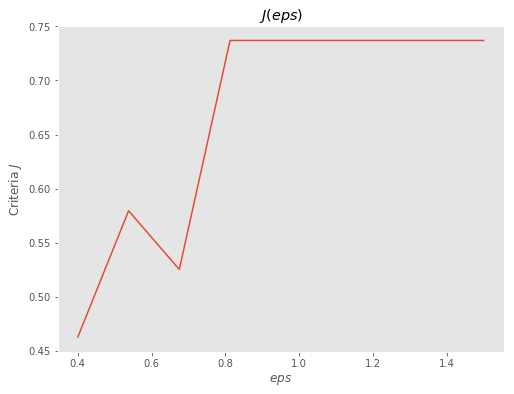

In [26]:

ks = np.linspace(0.4, 1.5, num=9)

criteria = np.zeros(len(ks))
x = x_iris
for i, k in enumerate(ks):   
    cls = mDBSCAN(eps = k, min_samples=4)
    y = cls.fit_predict(x)
    criteria[i] = quality(x, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(eps)$")
pl.ylabel("Criteria $J$")
pl.xlabel("$eps$")
pl.grid()
pl.show()

Из графика видно, что наилучшее значение eps около 0.9

In [20]:
## Задание 3
df = pd.read_csv('WDIData.csv')
df = df.iloc[df.loc[df['Country Name']=='Afghanistan'].index[0]:]
all_years = df.columns.values[4:]
df['avg'] = df[all_years].mean(axis=1)

Так как пропусков в данных очень много попробуем анализировать среднее по всем годам для каждого индикатора

In [52]:
year = 'avg'
dfi = df[['Country Name', 'Indicator Code', year]]
dfi = dfi.set_index(['Country Name', 'Indicator Code'])
dfi = dfi.unstack()
dfi = dfi[year]

# drop columns with zero std
indx_with_zero_std = np.argwhere((dfi.std() == 0).values == True).ravel()
dfi = dfi.drop(dfi.columns.values[indx_with_zero_std], axis=1)

dfi = dfi.dropna(axis = 1, how='all')

dfi = dfi.fillna(dfi.mean())
# нормализуем данные
dfi = (dfi - dfi.mean())/dfi.std()
# удаляем пстолбцы полностью состоящие из nan
dfi = dfi.dropna(axis = 1, how='any')

# отставляем 80 столбцов с максимальным максимумом, т.е. считаем, 
# что эти столбцы в основном вносят вклад в кластеризацию
# indx_with_small_max = np.argwhere((dfi.max() < dfi.max().nlargest(10).min() ).values == True).ravel()
# dfi = dfi.drop(dfi.columns.values[indx_with_small_max], axis=1)

data = dfi.values

#Используем PCA для уменьшения размерности данных
from sklearn.decomposition import PCA
pca = PCA(n_components=210)
data = pca.fit_transform(data)

labels = dfi.index.tolist()


Clusters:  3


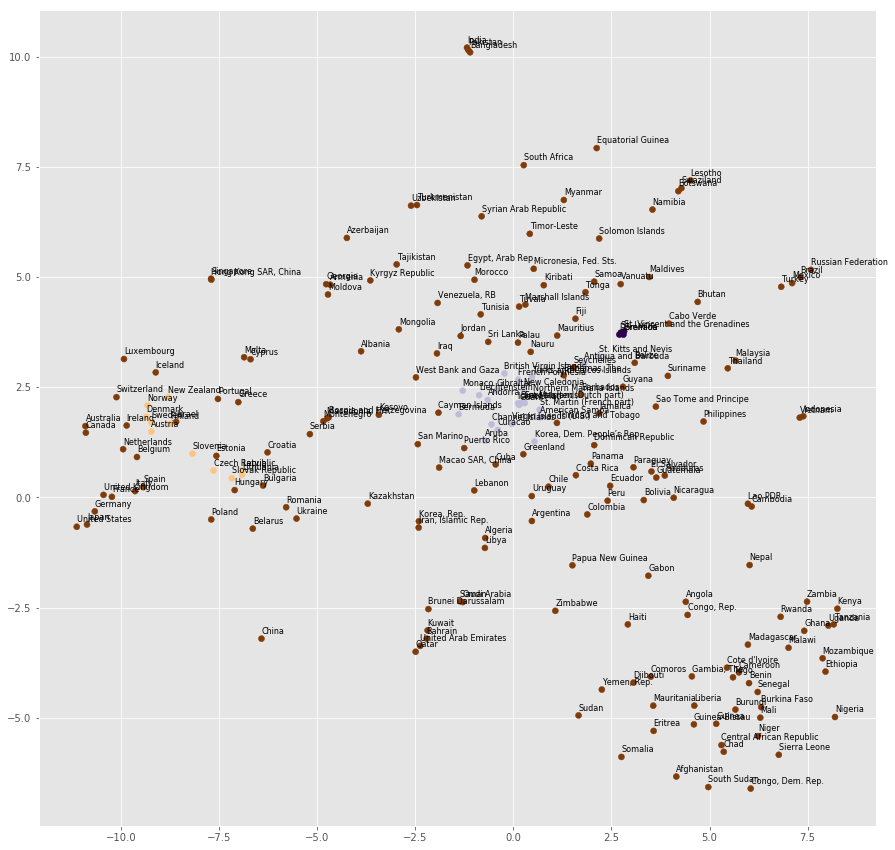

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong SAR, China'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran, Islamic Rep.' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya'
 'Kiribati' 'Korea, Rep.' 

In [68]:
cluster = mDBSCAN(eps=23, min_samples=2)
clusters = cluster.fit_predict(data)

print "Clusters: ", cluster.clusters_count

from sklearn import manifold

embedded = manifold.TSNE(n_components=2, learning_rate=20).fit_transform(data)


plt.figure(figsize=(15, 15))
plt.scatter(embedded[:,0], embedded[:,1], c=clusters, cmap=pl.cm.PuOr)
for i, label in enumerate(labels):
    plt.annotate(str(label).decode("utf8"), xy=embedded[i], xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.show()

nplabels =np.array(labels)
for i in np.unique(np.unique(clusters)):
      print nplabels[np.argwhere(clusters == i).ravel()]

## Задание 4

С данными параметрами получилась следующая кластеризация:

1. Острова ['American Samoa' 'Andorra' 'Antigua and Barbuda' 'Aruba' 'Bahamas, The', ...]
2. Северная европа 'Austria' 'Czech Republic' 'Denmark' 'Finland',...]
3. Маленькие близкорасположенные острова карибского залива ['Dominica' 'Grenada' 'St. Lucia' 'St. Vincent and the Grenadines']
4. Все остальные


Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.